# Análise exploratória de dados
A análise exploratória de dados visa buscar reconhecer os atributos ou características que proporcionam maior impacto nos resultados "alvos".
O objetivo desta prática é a realização de análises exploratórias a partir de uma base de dados de veículos tendo como objetivo a identificação das características que proporcionam maior impacto nos resultados (preço final).

## Quais são as principais características que impactam no preço do carro?

# 1. Importação dos dados

##     Importação das bibliotecas

In [6]:
import pandas as pd
import numpy as np

## A base de dados será carregada como um dataframe "df".
## Esta base de dados foi previamente importada, mas pode ser carregada diretamente do
## site no endereço:
 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'

In [7]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# 2. Análise das características ("features") individualmente através da visualização dos dados.

In [8]:
df.shape

(201, 29)

In [9]:
#
# Importação das bibliotecas de visualização dos dados
#
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importante ressaltar que a biblioteca para visualização de modelos estatísticos (seaborn) já vem
### instalada no anaconda 3, caso seu aplicativo não disponha desta biblioteca, utilize o comando 
### pip do python, ou seja: 
### %%capture
### !pip install seaborn

## Como escolher o método correto para visualização !!!
### É importante reconhecer os tipos de variáveis que está sendo tratada.
### Este procedimento visa identificar o melhor modelo de visualização das variáveis.

In [10]:
#
# lista do tipo de variáveis
#
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


In [11]:
print(df['peak-rpm'].dtype)

float64


### Pode-se calcular a correlação entre as variáveis do tipo int64 e float64 empregando-se o comando corr

In [12]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


## Cálculo da correlação entre: cilindro ("bore") , tração ("stroke"), taxa de compressão
## ("compression-ratio") e potência ("horsepower")

In [13]:
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


# Variáveis numéricas continuas

### Tratam-se de variáveis que contém qualquer valor com a mesma dimensão. Podem ser do tipo "int64"
### ou "float64".
Uma boa prática para visualização dessas variáveis é o emprego da plotagem com dispersão em composição com o
ajuste de linhas.
Utilizaremos o método regplot para ilustrar o entendimento da relação linear entre uma variável individual e o preço.

(0, 53223.85688808005)

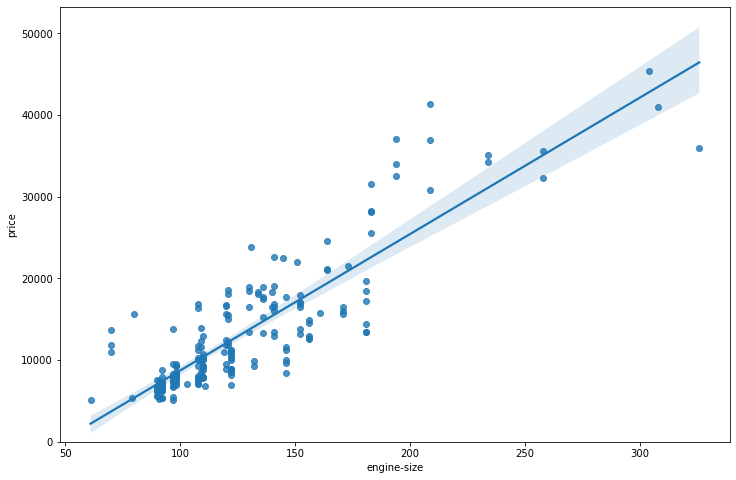

In [14]:
# Dimensão do motor vs preço
plt.figure(figsize=(12,8))
sns.regplot(x="engine-size",y="price",data=df)
plt.ylim(0,)

In [15]:
df[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


## Observe que o valor da correlação (próximo de 1) identifica a existência de uma boa relação entre os atributos
## Outras variáveis com valores altos de correlação também podem ser verificadas

### Atividade: Verifique a correlação e faça o gráfico representativo das variáveis listadas abaixo em relação ao preço dos veículos": 
<us><li>largura('width')</li> <li> peso('curb-weight')</li> <li> tração('stroke')</li> <li>consumo em mpg na cidade ('city-mpg')</li> <li>consumo na estrada('highway-mpg')</li> <li>veículo movido a diesel ('diesel') e</li> <li>veículo movido a gasolina ('gas').</li>

### Qual desses atribuitos você selecionaria para a construção de um modelo ???

## Relação Linear Fraca

### Vamos avaliar a variável "peak-rpm" em relação ao preço ("price") do veículo:

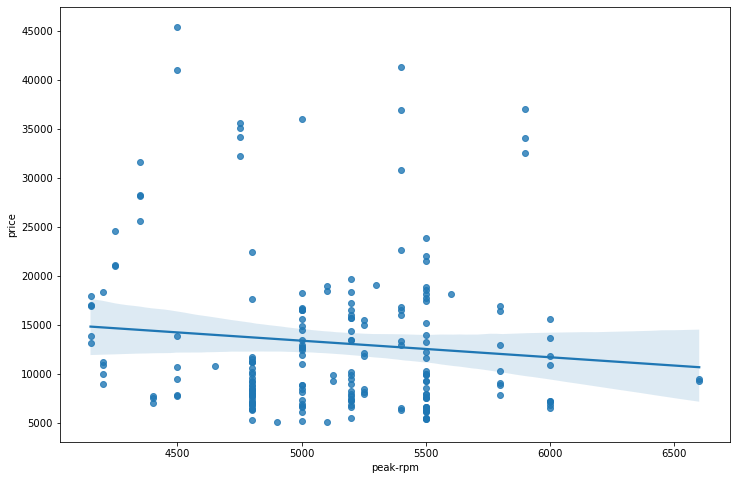

In [16]:
plt.figure(figsize=(12,8))
sns.regplot(x="peak-rpm",y="price",data=df)

In [17]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


## Os resultados mostraram um relação linear "fraca". A variável contínua "peak-rpm" não seria uma boa seleção para inclusão em um modelo preditivo do preço do automóvel.

# Variáveis Categóricas ("Features" ou Características)
### São variáveis que descrevem a característica de uma unidade de dado e são selecionadas de um pequeno grupo de categorias.
### As variáveis categóricas podem ser dos tipos "object" ou "int64".
### Uma boa alternativa para visualização de variáveis categóricas é o uso do "boxplot".
### Vamos avaliar a relação entre "body-style" (tipo, ou categoria do veículo) e o preço ("price").

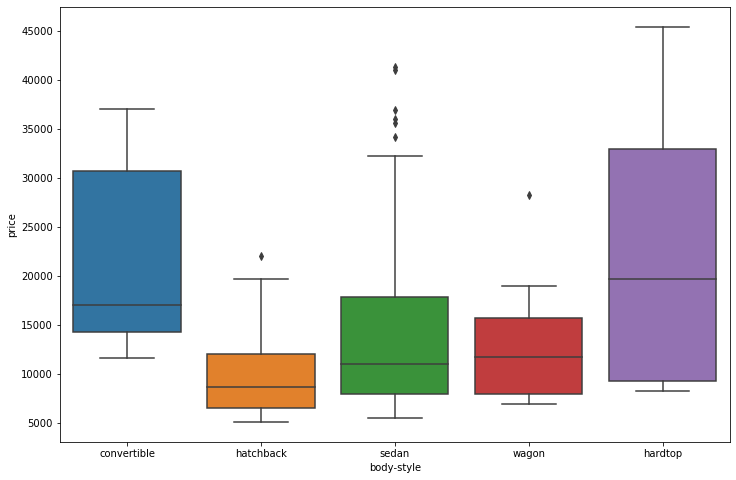

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(x='body-style',y='price',data=df)

### Observe os resultados mostraram a sobreposíção de preços em relação ao estilo do carro.
### Desta forma podemos concluir que esta variável não é uma boa variável para predição de preço.
### Deve-se portanto investigar outras variáveis categógicas a fim de estabelecer novas relações. Vamos avaliar a localização do motor ("engine-location") e o preço.

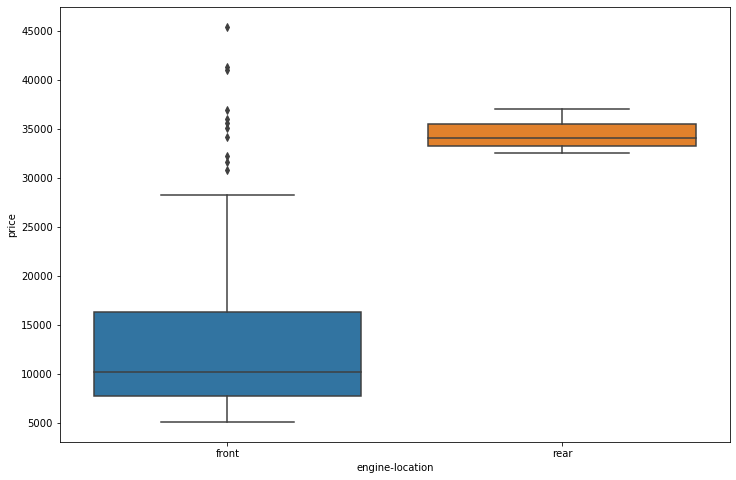

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(x='engine-location',y='price',data=df)

### Observa-se que os valores de localização do motor em relação ao preço mostraram boa distinção e podem ser considerados na elaboração de um modelo preditivo.
### Realize a mesma análise empregando o tipo de tração (dianteira, traseira ou quatro rodas) que está representada pela variável categórica "drive-wheels", com o preço do veículo. O que você concluiu ???

# 3 - Análise Estatística Descritiva

### Primeiramente vamos visualizar as variáveis utilizando o método "description". Este método calcula a estatística básica para todas as variáveis contínuas. Campos sem valores numéricos (NaN) são descartados automaticamente. Este método irá apresentar:

<ul>
    <li> a frequência da variável</li>
    <li> a média</li>
    <li> o desvio padrão</li>
    <li> Mínimo</li>
    <li> IQR (Distribuição Interquartil: 25%, 50% e 75%)</li>
    <li> Máximo</li>
</ul>

In [20]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


### Pode-se aplicar o método describe em variáveis do tipo "objeto"

In [21]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


## Contagem de valores

### Uma boa maneira para conhecimento do número de características variáveis.<br/>Iremos aplicar o método "value_counts" na coluna 'drive-wheels'.<br/> Este método só trabalha sobre séries pandas e não dataframes, logo, será aplicado somente sobre um colchete.  

In [22]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

### Pode-se converter a série em um dataframe

In [23]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


### Repetindo a operação e salvando os resultados em um dataframe.<br/> Renomeando a coluna 'drive-wheels' para  'value_counts'.

In [24]:
drive_wheels_counts=df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels':'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


### Renomeando o índice para 'drive-wheels'

In [25]:
drive_wheels_counts.index.name='drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


### Repetindo o processo para localização do motor ('engine-location')

In [26]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location':'value_counts'},inplace=True)
engine_loc_counts.index.name='engine-location'
engine_loc_counts

,value_counts
engine-location,
front,198
rear,3


### Devido a distribuição desbalanceada, a variável não deve ser considerada em um modelo preditivo

# 4. Agrupamento

### O método "groupby" agrupa variáveis de diferentes categorias.<br/> Os dados são agrupados em uma ou várias variáveis e as análises são realizadas por grupos individualmente.<br/> Exemplo: agrupamento da variável drive-wheels.

In [27]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [28]:
df_group_one = df[['drive-wheels','body-style','price']]

### Cálculo do preço médio para cada categoria

In [29]:
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


### Os resultados mostraram que os veículos com tração traseira ("rwd") são mais caros.<br/>Este processo permite o agrupamento e análise de várias variáveis.

In [30]:
df_gpt = df[['drive-wheels','body-style','price']]
df_gpt1=df_gpt.groupby(['drive-wheels','body-style'],as_index=False).mean()
df_gpt1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


### O privotamento da tabela permite uma melhor visualização e entendimento dos dados.<br/>Neste caso a variável "drive-wheels" indicará as linhas e "body-style" as colunas.

In [31]:
gpt1_pivot = df_gpt1.pivot(index='drive-wheels',columns='body-style')
gpt1_pivot = gpt1_pivot.fillna(0) # preenchimento dos valores ausentes com 0
gpt1_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

### Apresentação dos resultados.<br/> Drive-wheels, body-style vs price

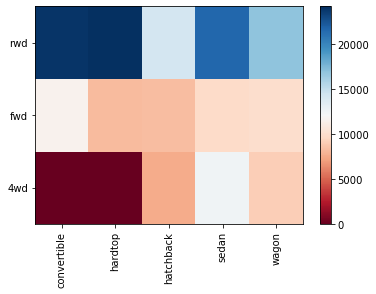

In [32]:
fig, ax = plt.subplots()
im = ax.pcolor(gpt1_pivot, cmap='RdBu')
row_labels=gpt1_pivot.columns.levels[1]
col_labels=gpt1_pivot.index
ax.set_xticks(np.arange(gpt1_pivot.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(gpt1_pivot.shape[0])+0.5, minor=False)
ax.set_xticklabels(row_labels,minor=False)
ax.set_yticklabels(col_labels,minor=False)
plt.xticks(rotation=90)
fig.colorbar(im)
plt.show()

# 5. Correlação e Causalidade

### Correlação: medida de extensão da interdependência entre variáveis.<br/> Causalidade: relação de causa e efeito entre duas variáveis.

### Correlação e Causalidade são conceitos diferentes e a correlação não implica em causalidade. <br/> Determinar a correlação é muito mais simples do que determinar a causalidade. <br/> A determinação da causalidade pode requerer a experimentação individual.

### Coeficiente de Correlação de Pearson: identifica o nível de correlação entre duas variáveis (int64 ou float64) X e Y. <br/> Tem-se:
<ul>
    <li><H3> 1 - Forte correlação positiva</H3></li>
    <li><H3> 0 - Sem correlação</H3></li>
    <li><H3> -1 - Forte correlação negativa</H3></li>
</ul>

In [33]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


## P-value (ou P-valor)

### É o valor da probabilidade de que a correlação entre duas variáveis é estatisticamente significante.<br/>Um nível de significância de 0.05 (5%) representa 95% de confiança no valor da correlação entre as variáveis. Ou seja:
<ul>
    <li><H3> p menor que 0.001: forte evidência de que a correlação é significante </H3></li>
    <li><H3> p menor que 0.05: evidência moderada de que a correlação é significante </H3></li>
    <li><H3> p menor que 0.1:  evidência fraca de que a correlação é significante </H3></li>
    <li><H3> p maior que 0.1: não existe evidência de que a correlação é significante </H3></li>
</ul>   

### Estas informações podem ser obtidas a partir da aplicação do módulo stats da biblioteca "scipy"

In [34]:
from scipy import stats

## Wheel base x price

### Cálculo do coeficiente de correlação e do P-valor

In [35]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'],df['price'])
print("Coeficiente Pearson de correlação:  ",pearson_coef,"\nP-value: ",p_value)

Coeficiente Pearson de correlação:   0.5846418222655085 
P-value:  8.076488270732243e-20


### Conclusão: O valor do coeficiente Pearson de correlação mostrou uma moderada para fraca relação linear entre as variáveis "wheel-base" e "price"<br/> Já o P-value mostrou que o resultado da correlação é obtido com alta significância, ou seja, os resultados são confiáveis. 

## Horsepower x price

### Cálculo do coeficiente de correlação e do P-valor

In [36]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'],df['price'])
print("Coeficiente Pearson de correlação:  ",pearson_coef,"\nP-value: ",p_value)

Coeficiente Pearson de correlação:   0.8095745670036559 
P-value:  6.369057428260101e-48


### Conclusão: O valor do coeficiente Pearson de correlação mostrou uma relação linear forte entre as variáveis "horsepower" e "price".<br/> O P-value mostrou que o resultado da correlação é obtido com alta significância, ou seja, os resultados são confiáveis.

## Length x price

In [37]:
pearson_coef, p_value = stats.pearsonr(df['length'],df['price'])
print("Coeficiente Pearson de correlação:  ",pearson_coef,"\nP-value: ",p_value)

Coeficiente Pearson de correlação:   0.6906283804483643 
P-value:  8.01647746615853e-30


### Conclusão: O valor do coeficiente Pearson de correlação mostrou uma relação moderada entre as variáveis "length" e "price".<br/> O P-value mostrou que o resultado da correlação é obtido com alta significância, ou seja, os resultados são confiáveis.

## Width x price

In [38]:
pearson_coef, p_value = stats.pearsonr(df['width'],df['price'])
print("Coeficiente Pearson de correlação:  ",pearson_coef,"\nP-value: ",p_value)

Coeficiente Pearson de correlação:   0.7512653440522666 
P-value:  9.200335510483739e-38


### Conclusão: O valor do coeficiente Pearson de correlação mostrou uma relação linear forte entre as variáveis "Width" e "price".<br/> O P-value mostrou que o resultado da correlação é obtido com alta significância, ou seja, os resultados são confiáveis.

## Curb-weight x price

In [39]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'],df['price'])
print("Coeficiente Pearson de correlação:  ",pearson_coef,"\nP-value: ",p_value)

Coeficiente Pearson de correlação:   0.8344145257702845 
P-value:  2.189577238893816e-53


### Conclusão: O valor do coeficiente Pearson de correlação mostrou uma relação linear forte entre as variáveis "Curb-weight" e "price".<br/> O P-value mostrou que o resultado da correlação é obtido com alta significância, ou seja, os resultados são confiáveis.

## Engine size x price

In [40]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'],df['price'])
print("Coeficiente Pearson de correlação:  ",pearson_coef,"\nP-value: ",p_value)

Coeficiente Pearson de correlação:   0.8723351674455188 
P-value:  9.265491622196808e-64


### Conclusão: O valor do coeficiente Pearson de correlação mostrou uma relação linear forte entre as variáveis "Engine size" e "price".<br/> O P-value mostrou que o resultado da correlação é obtido com alta significância, ou seja, os resultados são confiáveis.

## Bore x price

In [41]:
pearson_coef, p_value = stats.pearsonr(df['bore'],df['price'])
print("Coeficiente Pearson de correlação:  ",pearson_coef,"\nP-value: ",p_value)

Coeficiente Pearson de correlação:   0.54315538326266 
P-value:  8.049189483935489e-17


### Conclusão: O valor do coeficiente Pearson de correlação mostrou uma relação linear fraca entre as variáveis "Bore" e "price".<br/> O P-value mostrou que o resultado da correlação é obtido com alta significância, ou seja, os resultados são confiáveis.

## City-mpg x price

In [42]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'],df['price'])
print("Coeficiente Pearson de correlação:  ",pearson_coef,"\nP-value: ",p_value)

Coeficiente Pearson de correlação:   -0.6865710067844684 
P-value:  2.3211320655672453e-29


### Conclusão: O valor do coeficiente Pearson de correlação mostrou uma relação linear moderada entre as variáveis "City-mpg" e "price".<br/> O P-value mostrou que o resultado da correlação é obtido com alta significância, ou seja, os resultados são confiáveis.

## Highway-mpg x price

In [43]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'],df['price'])
print("Coeficiente Pearson de correlação:  ",pearson_coef,"\nP-value: ",p_value)

Coeficiente Pearson de correlação:   -0.7046922650589534 
P-value:  1.749547114447437e-31


### Conclusão: O valor do coeficiente Pearson de correlação mostrou uma relação linear negativa e moderada para forte entre as variáveis "Highway-mpg" e "price".<br/> O P-value mostrou que o resultado da correlação é obtido com alta significância, ou seja, os resultados são confiáveis.

### Quais variáveis numéricas poderiam ser selecionadas na construção de um modelo preditivo ???

### Horsepower<br/>Width<br/>Curb-weight<br/>Engine size

# Análise de Variância ==> ANOVA

### Método estatístico empregado para avaliação da diferença entre as médias de dois ou mais conjuntos (grupos) de dados. <br/> Nas análises são considerados dois parâmetros.
### F-test-score: ANOVA assume um valor único para a média de todos os dados. Realiza o cálculo do desvio das médias dos grupos em relação a média assumida. Quanto maior o valor do F-test-score, maior a diferença entre as médias.
### P-value: retorna a significância estatística do cálculo.

## Drive Wheels (Tração dianteira, traseira e nas quatro rodas)
### São variáveis categorizadas. A função groupby irá capturar os grupos e as médias serão calculadas sobre cada grupo.

In [44]:
gpt2=df_gpt[['drive-wheels','price']].groupby(['drive-wheels'])
gpt2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [45]:
df_gpt

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [46]:
gpt2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

### Aplicação da função "f_oneway" no módulo stats para obtenção dos valores do F-test-score e P-value

In [47]:
f_val,p_val=stats.f_oneway(gpt2.get_group('fwd')['price'],gpt2.get_group('rwd')['price'],gpt2.get_group('4wd')['price'])
print("resultados da ANOVA \tF-test-score: ",f_val,"\tP-value: ",p_val)

resultados da ANOVA 	F-test-score:  67.95406500780399 	P-value:  3.3945443577151245e-23


### Os resultados mostraram que os três grupos de veículos (tração dianteira, tração trazeira e tração nas quatro rodas) mostraram uma forte correlação com boa significância.
### Avaliando as categorias em pares: Tração dianteira x Tração traseira

In [48]:
f_val,p_val=stats.f_oneway(gpt2.get_group('fwd')['price'],gpt2.get_group('rwd')['price'])
print("resultados da ANOVA \tF-test-score: ",f_val,"\tP-value: ",p_val)

resultados da ANOVA 	F-test-score:  130.5533160959111 	P-value:  2.2355306355677845e-23


### Tração traseira (rwd) x Tração nas quatro rodas(4wd)

In [49]:
f_val,p_val=stats.f_oneway(gpt2.get_group('rwd')['price'],gpt2.get_group('4wd')['price'])
print("resultados da ANOVA \tF-test-score: ",f_val,"\tP-value: ",p_val)

resultados da ANOVA 	F-test-score:  8.580681368924756 	P-value:  0.004411492211225333


### Tração dianteira (fwd) x Tração nas quatro rodas(4wd)

In [50]:
f_val,p_val=stats.f_oneway(gpt2.get_group('fwd')['price'],gpt2.get_group('4wd')['price'])
print("resultados da ANOVA \tF-test-score: ",f_val,"\tP-value: ",p_val)

resultados da ANOVA 	F-test-score:  0.6654657502523033 	P-value:  0.41620116697845666
